# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append('..')

from src.visualizations import plot_kdes,plot_boxplots,plot_scatterplot,plot_crosstab,plot_bar_by_target,plot_piecharts


In [2]:
# Load the processed data
df = pd.read_csv('..\data\processed\cardio_processed.csv')

Let's first display the correlation heatmap, in order to get a general idea of what relationships we should explore:

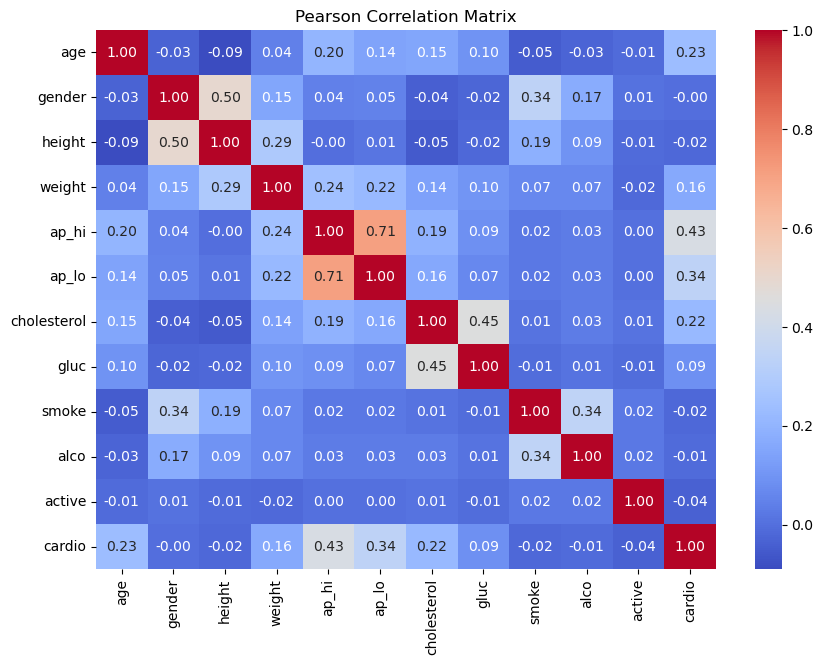

In [3]:
# Calculate the correlation matrix
corr = df.corr()

# Display the heatmap of the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Matrix")
plt.show()

Attributes are not well correlated with each other, except for maybe the ap_hi and ap_lo columns with 0.71 correlation, which is excptected, since these are similar features. This is good news, because we have no multicollinearity. 

## Numeric Features

Plot the KDE distributions of each numeric columns in order to determine, which scaling strategy to use:

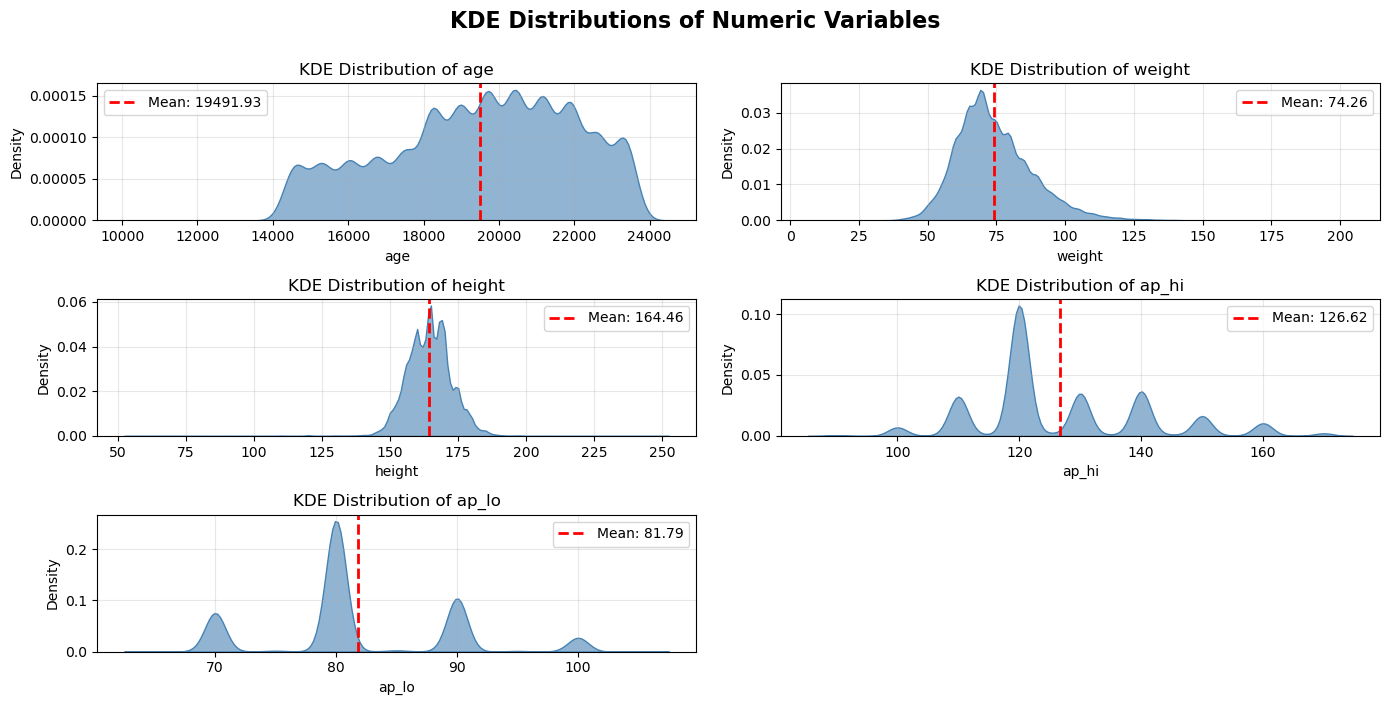

In [4]:
numeric_features = ['age', 'weight', 'height', 'ap_hi','ap_lo']

plot_kdes(numeric_features,df,nrows = 3, ncols = 2, figsize = (14,7),
         suptitle ='KDE Distributions of Numeric Variables' )

* age - non-gaussian distribution, minmax scaler is best for this.
* weight - gaussian distribution, mean matches mode, so let's use standard scaler for this.
* height - gaussian distribution, mean matches mode, so let's use stadndard scaler for this too.
* ap_hi - non-gaussian distribution, so use minmax scaler for this.
* ap_lo - non-gaussian distribution, so use minmax scaler for this as well.

Display the violin plot of all continious variables by the target variable in order to identify how target variable is influenced by each of these attributes:

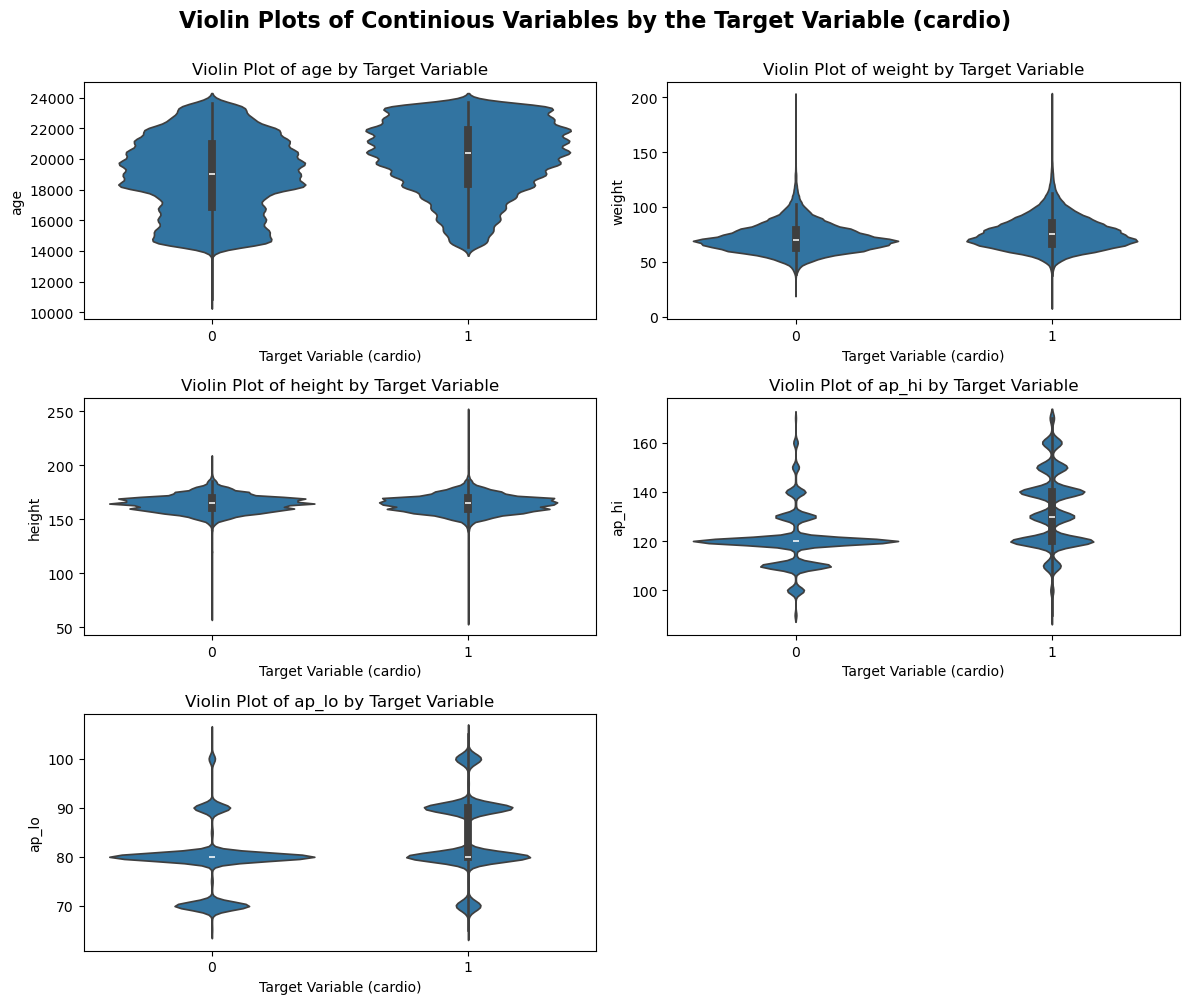

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.violinplot(ax=axes[i], x='cardio', y=col, data=df)
    axes[i].set_title(f'Violin Plot of {col} by Target Variable')
    axes[i].set_xlabel('Target Variable (cardio)')
    axes[i].set_ylabel(col)

# Hide any extra subplots (if n_plots doesn't fill all subplots)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Violin Plots of Continious Variables by the Target Variable (cardio)",
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

* weight and height columns on their own have no immediate visible effect on hte target variable it seems, because the distributions are the same for both 0 and 1 values of cardio.
* it seems that age columns may influence the target variable, which is actually realistic.
* ap_hi and ap_hi columns spike up at the normal levels of mmHG for the 0 value, which makes sense.

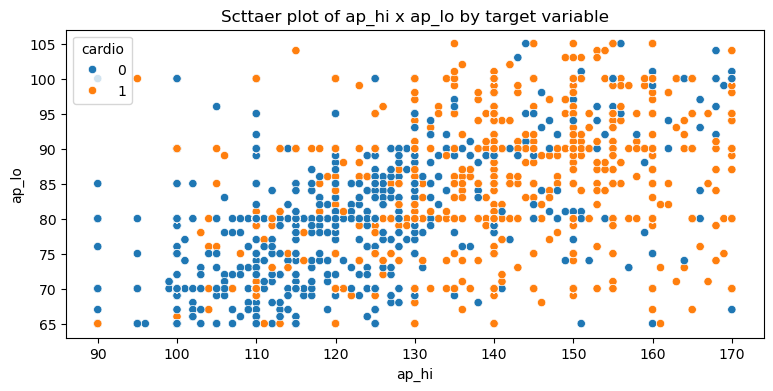

In [6]:
plot_scatterplot(df = df,x = 'ap_hi',y = 'ap_lo', hue = 'cardio',
                 title = 'Scttaer plot of ap_hi x ap_lo by target variable')

Higher the mmHG levels more likely forthe patient to have cardiovascular disease.

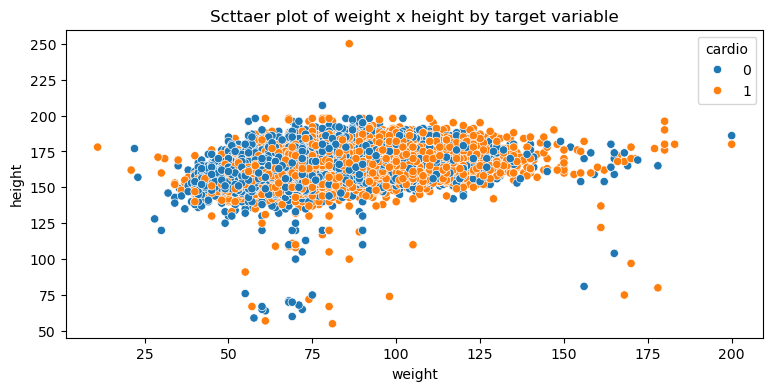

In [7]:
plot_scatterplot(df = df,x = 'weight',y = 'height', hue = 'cardio',
                 title = 'Scttaer plot of weight x height by target variable')

This scatterplot is less informatical, although we can see, that higher the weight more frequent the orange dots, meaning obessity may be one of the causes for cardiovascular disease, which is realistic.

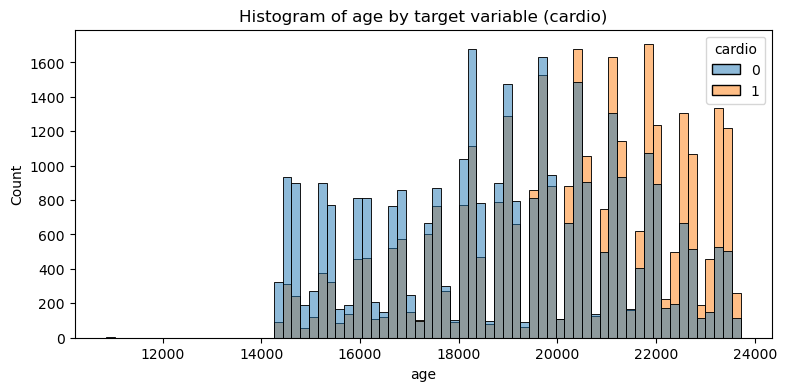

In [8]:
plt.figure(figsize = (9,4))

sns.histplot(data = df, x = 'age', hue = 'cardio')
plt.title('Histogram of age by target variable (cardio)')
plt.xlabel('age')
plt.show()

Age highly contributes to implication of cardiovascular disease, since the positive cases are spiked up the older the person gets.

Let's plot the pairplot of these numeric variables witht he hue of the target variable to summarize what we found:

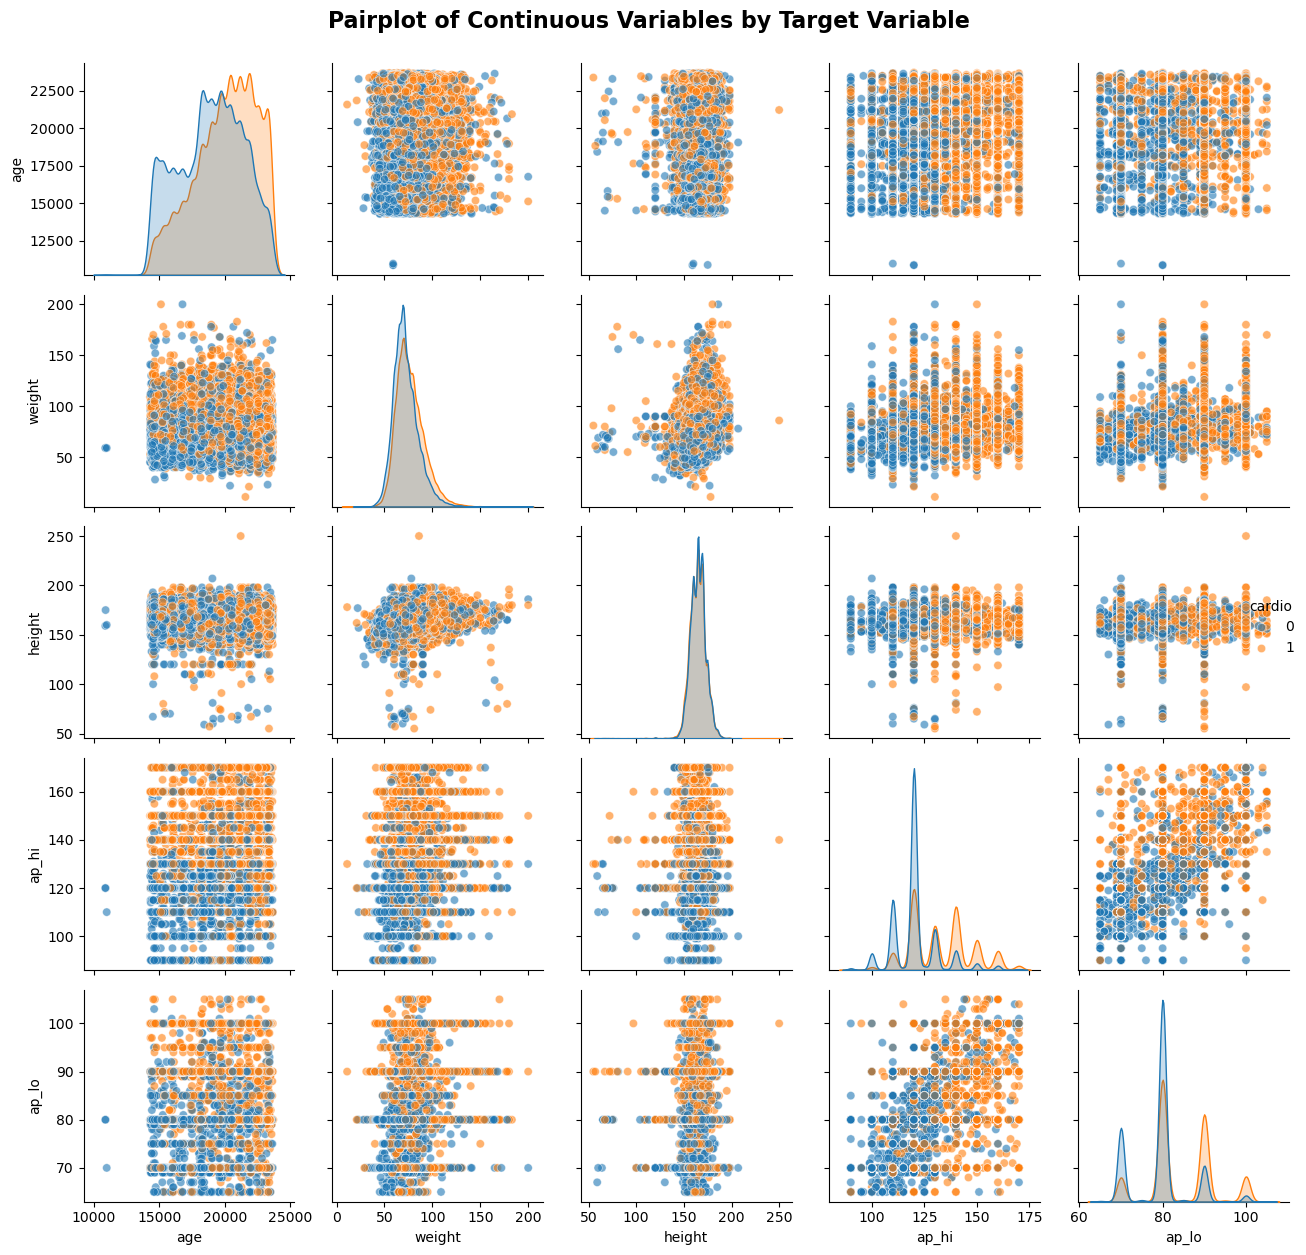

In [9]:
# Create pairplot
sns.pairplot(df[numeric_features + ['cardio']], 
             hue='cardio',
             diag_kind='kde', 
             plot_kws={'alpha': 0.6},
             height=2.5)

plt.suptitle('Pairplot of Continuous Variables by Target Variable', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## Categorical Features

Let's start with plotting the distributions of the categorical columns using Piecharts:

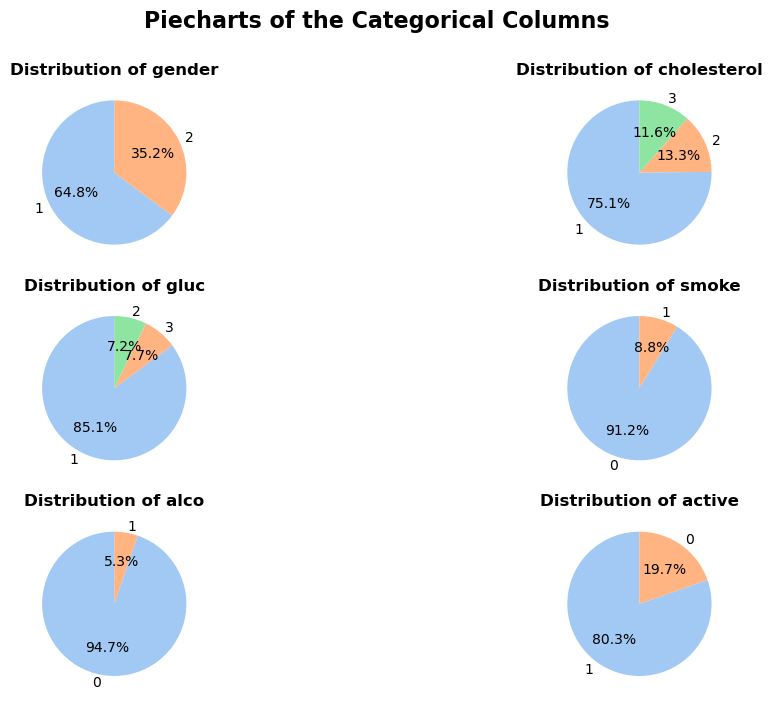

In [10]:
categorical_features = ['gender','cholesterol','gluc','smoke','alco','active']

plot_piecharts(categorical_features,df,nrows = 3,ncols = 2,figsize = (14,7),
               suptitle = 'Piecharts of the Categorical Columns')

The first class dominates each cateogorical features, meaning these are quite imbalanced, but it doesn't matter as long as they are independent variables.

Let's visualize Barplots of each categorical column by the target variable:

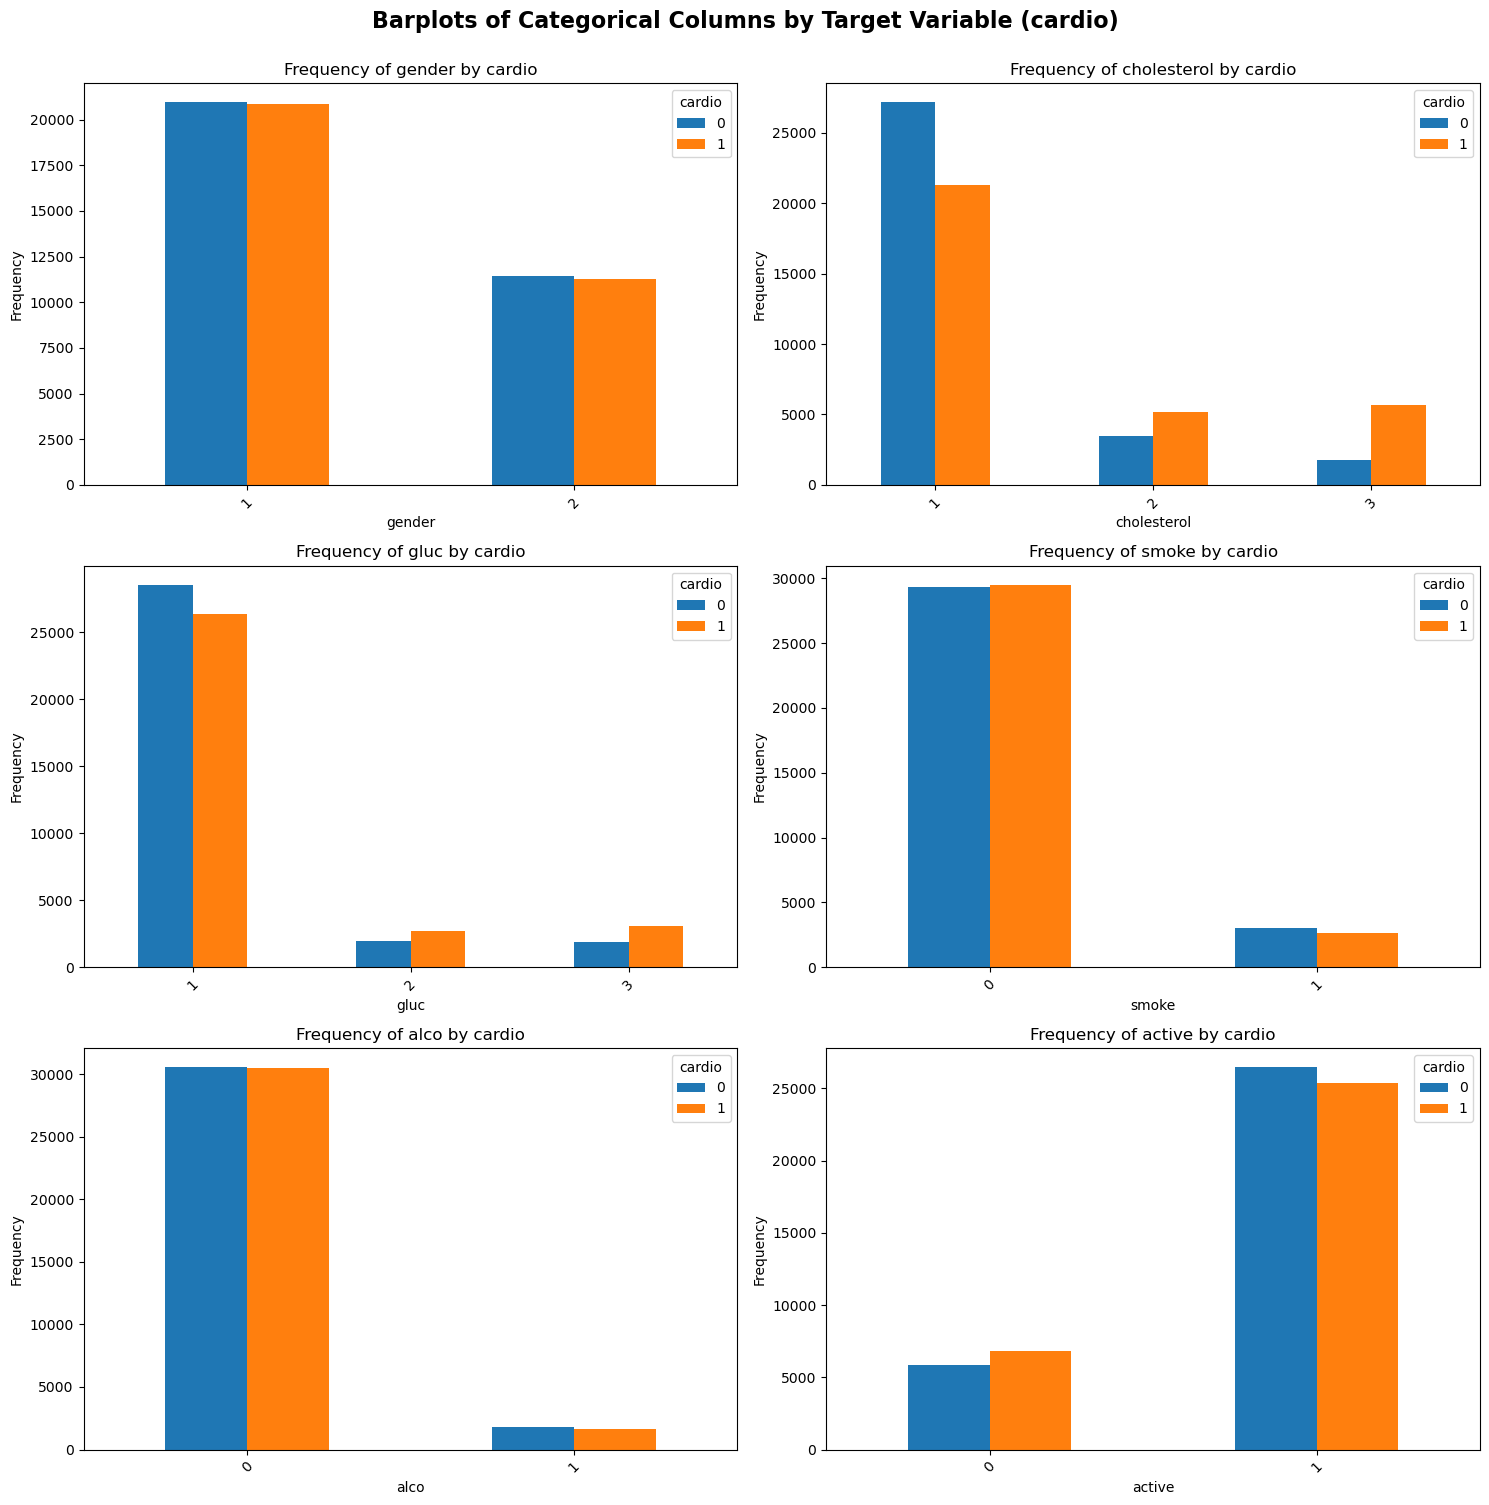

In [11]:
plot_bar_by_target(df,categorical_features,'cardio',
                   suptitle = 'Barplots of Categorical Columns by Target Variable (cardio)')

Overall, the bar plots seem to be stratified with respect to the target variable, only insights we gain from this is that higheer the cholesterol and glucose levels, higher the risk for cardiovascular disease, which makes sense. Let's visualize the crosstab for cholesterol and glucose levels with by the target variable for better observation:

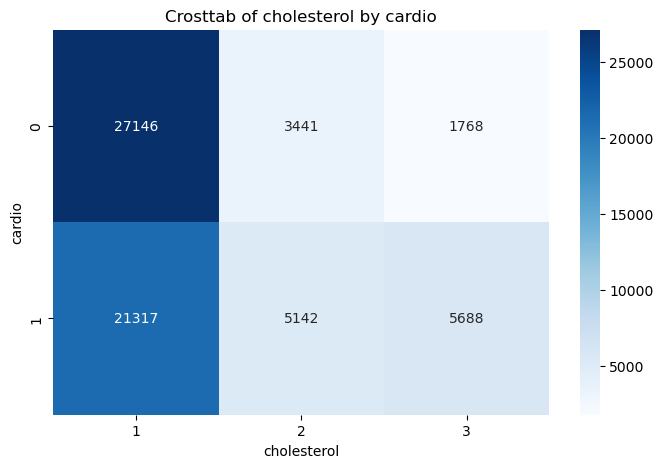

In [12]:
plot_crosstab(df,'cholesterol','cardio')

* Normal cholesterol level indicates more frequent negative cases
* Above normal cholesterol level indicates more frequent positive cases
* Well above normal cholesterol level indicates high chance of a positive case

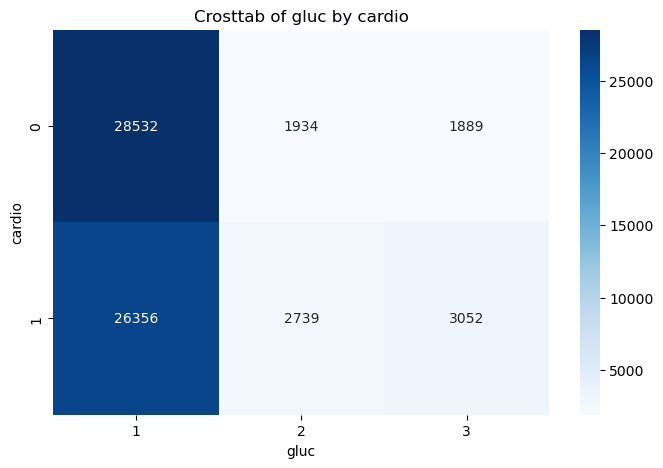

In [14]:
plot_crosstab(df,'gluc','cardio')

* Normal glucose level indicates more frequent negative cases
* Above normal glucose level indicates more frequent positive cases
* Well above normal glucose level indicates high chance of a positive case